## **Milestone 2 -  Automated Data Preprocessing for Image Classification** 

based on notebook from Xiaotian Han



In this milestone, you will implement the an automated deep learning model for image classification using the Funtional API of AutoKeras. The step is listed as follows:

1. Load and prepare cifar10 dataset
3. Build the automated deep learning model
3. Explore the searched model
4. Retrain and evaluate searched model

In [1]:
#%%capture
#!pip install tensorflow==2.5.0
#!pip install autokeras==1.0.16

In [2]:
# import the python packages
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Layer, Dense, ReLU, Softmax, MaxPooling2D, Flatten, Conv2D

import autokeras as ak

print( "tf.__version__:", tf.__version__ )
print( "ak.__version__:", ak.__version__ )

2021-09-05 20:20:59.584421: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


tf.__version__: 2.5.0
ak.__version__: 1.0.16


## Load dataset

Download the CIFAR1O dataset.
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [3]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Training image shape:', x_train.shape)
print('Training label shape:', y_train.shape)
print('Testing image shape:', x_test.shape)
print('Testing label shape:', y_test.shape)

Training image shape: (50000, 32, 32, 3)
Training label shape: (50000, 1)
Testing image shape: (10000, 32, 32, 3)
Testing label shape: (10000, 1)


In [4]:
# List the classes in the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
num_classes = len(class_names)
print(num_classes)

10


#### Load cifar10 dataset

(-0.5, 31.5, 31.5, -0.5)

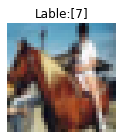

In [6]:
from sklearn.utils import resample
x_train, y_train = resample(x_train, y_train, n_samples=10000, replace=False, random_state=0)

image = x_train[0]
label = y_train[0]

# The normal figure
plt.figure( figsize=(2,2) )
plt.tight_layout()
plt.imshow(x_train[0].reshape(32,32,3), interpolation='none')
plt.title("Lable:{}".format(y_train[0]))
plt.axis('off')

#### Plot first 20 images

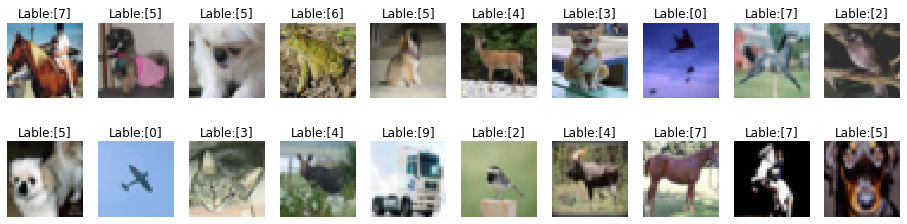

In [7]:
# plot first 20 images
plt.figure( figsize=(16,4) )
plt.tight_layout()
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(x_train[i].reshape(32,32,3), interpolation='none')
    plt.title("Lable:{}".format(y_train[i]))
    plt.axis('off')

#### Prepare data

In [8]:
# scale
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# reshape
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)
print('Training image shape:', x_train.shape)
print('Training label shape:', y_train.shape)
print('Testing image shape:', x_test.shape)
print('Testing label shape:', y_test.shape)

Training image shape: (10000, 32, 32, 3)
Training label shape: (10000, 1)
Testing image shape: (10000, 32, 32, 3)
Testing label shape: (10000, 1)


## Build automated deep learning model

#### Build model with Functional API

In [12]:
# Prepare automodel for search
inputs = ak.ImageInput()
#inputs = ak.Input()
# Add data normalization and image augmentation with AutoKeras built-in API
# Your code here
x = ak.Normalization()(inputs)
x = ak.ImageAugmentation()(x)
# Your code here
x = ak.ConvBlock(
    #num_blocks=3,
    )(x)
outputs = ak.ClassificationHead(
    #num_classes=num_classes,
    #multi_label=True,
    dropout=0.0)(x)

clf = ak.AutoModel(
    inputs=inputs, 
    outputs=outputs,
    max_trials=4,
    overwrite=True,
    seed=42)

## Explore Model

In [13]:
clf.fit(x_train, y_train, 
    epochs=10,
    #verbose=2
)

Trial 4 Complete [00h 00m 49s]
val_loss: 1.441372036933899

Best val_loss So Far: 1.441372036933899
Total elapsed time: 00h 03m 24s
INFO:tensorflow:Oracle triggered exit


Epoch 1/10
313/313 [==============================] - 5s 13ms/step - loss: 2.1231 - accuracy: 0.2152
Epoch 2/10
313/313 [==============================] - 4s 13ms/step - loss: 1.8461 - accuracy: 0.3313
Epoch 3/10
313/313 [==============================] - 4s 13ms/step - loss: 1.6805 - accuracy: 0.3812
Epoch 4/10
313/313 [==============================] - 4s 13ms/step - loss: 1.5998 - accuracy: 0.4127
Epoch 5/10
313/313 [==============================] - 4s 13ms/step - loss: 1.5459 - accuracy: 0.4384
Epoch 6/10
313/313 [==============================] - 4s 13ms/step - loss: 1.5020 - accuracy: 0.4534
Epoch 7/10
313/313 [==============================] - 4s 13ms/step - loss: 1.4707 - accuracy: 0.4684
Epoch 8/10
313/313 [==============================] - 4s 13ms/step - loss: 1.4333 - accuracy: 0.4856
Epoch 9/10
313/313 [==============================] - 4s 12ms/step - loss: 1.4047 - accuracy: 0.4947
Epoch 10/10
313/313 [==============================] - 4s 12ms/step - loss: 1.3748 - accura

2021-09-05 20:30:25.286631: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./auto_model/best_model/assets


In [14]:
# Get the summarized results during the tuning process (return the best 10 models if existed)
clf.tuner.results_summary()

Results summary
Results in ./auto_model
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
image_augmentation_2/translation_factor: 0.0
image_augmentation_2/horizontal_flip: True
image_augmentation_2/vertical_flip: True
image_augmentation_2/rotation_factor: 0.0
image_augmentation_2/zoom_factor: 0.0
image_augmentation_2/contrast_factor: 0.0
conv_block_2/kernel_size: 3
conv_block_2/separable: True
conv_block_2/max_pooling: True
conv_block_2/dropout: 0
conv_block_2/num_blocks: 2
conv_block_2/num_layers: 2
conv_block_2/filters_0_0: 16
conv_block_2/filters_0_1: 32
conv_block_2/filters_1_0: 32
conv_block_2/filters_1_1: 64
classification_head_2/spatial_reduction_1/reduction_type: flatten
optimizer: adam
learning_rate: 0.001
Score: 1.441372036933899
Trial summary
Hyperparameters:
image_augmentation_2/translation_factor: 0.0
image_augmentation_2/horizontal_flip: True
image_augmentation_2/vertical_flip: True
image_augmentation_2/rotation_factor: 0.0

In [15]:
#Retrieve best model
best_model = clf.export_model()
best_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 32, 32, 3)         0         
_________________________________________________________________
normalization (Normalization (None, 32, 32, 3)         7         
_________________________________________________________________
random_flip (RandomFlip)     (None, 32, 32, 3)         0         
_________________________________________________________________
separable_conv2d (SeparableC (None, 30, 30, 16)        91        
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 28, 28, 32)        688       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0     

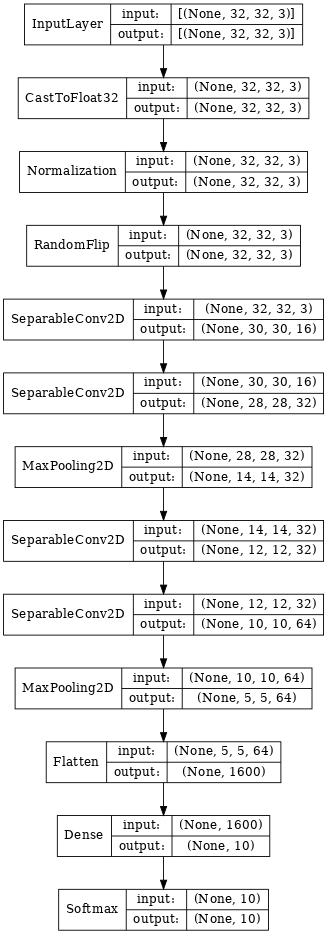

In [16]:
# Converts a Keras model to dot format and plot an image
tf.keras.utils.plot_model(best_model, show_layer_names=False, show_shapes=True, expand_nested=True, dpi=64)

## Retrain and evaluate searched model

In [17]:
(x_train, y_train), (x_test, y_test) =  cifar10.load_data()
# scale
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# reshape
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)
print('Training image shape:', x_train.shape)
print('Training label shape:', y_train.shape)
print('Testing image shape:', x_test.shape)
print('Testing label shape:', y_test.shape)

# compile the model and train the model
best_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
best_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.20)

Training image shape: (50000, 32, 32, 3)
Training label shape: (50000, 1)
Testing image shape: (10000, 32, 32, 3)
Testing label shape: (10000, 1)


2021-09-05 20:32:33.240601: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/10
625/625 [==============================] - 11s 15ms/step - loss: 1.3533 - accuracy: 0.5199 - val_loss: 1.3082 - val_accuracy: 0.5411
Epoch 2/10
625/625 [==============================] - 9s 14ms/step - loss: 1.3021 - accuracy: 0.5397 - val_loss: 1.2673 - val_accuracy: 0.5522
Epoch 3/10
625/625 [==============================] - 9s 14ms/step - loss: 1.2595 - accuracy: 0.5559 - val_loss: 1.2910 - val_accuracy: 0.5408
Epoch 4/10
625/625 [==============================] - 9s 14ms/step - loss: 1.2318 - accuracy: 0.5655 - val_loss: 1.2179 - val_accuracy: 0.5705
Epoch 5/10
625/625 [==============================] - 9s 14ms/step - loss: 1.2009 - accuracy: 0.5785 - val_loss: 1.2344 - val_accuracy: 0.5693
Epoch 6/10
625/625 [==============================] - 9s 14ms/step - loss: 1.1783 - accuracy: 0.5883 - val_loss: 1.1824 - val_accuracy: 0.5830
Epoch 7/10
625/625 [==============================] - 9s 14ms/step - loss: 1.1579 - accuracy: 0.5963 - val_loss: 1.1733 - val_accuracy: 0.587

#### Evaluate the searched model

In [18]:
# evaluate the model
test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=1)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 1.1284 - accuracy: 0.6039
Test loss:  1.1284128427505493
Test accuracy:  0.6039000153541565
